<a href="https://colab.research.google.com/github/andre-almd/WorldHappinesReport/blob/main/WHR_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project to analyze data from the World Happines Report (WHR) 2023**

In [454]:
'''
Project to analyze data from the World Happines Report (WHR) 2023
'''

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import spearmanr

In [455]:
sns.set_theme(style="whitegrid", palette='tab10')

## **Análise Exploratória**

In [456]:
whr_df = pd.read_excel('/content/DataForTable2.1WHR2023.xls')
whr_df

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919
...,...,...,...,...,...,...,...,...,...,...,...
2194,Zimbabwe,2018,3.616480,7.783066,0.775388,52.625000,0.762675,-0.051219,0.844209,0.657524,0.211726
2195,Zimbabwe,2019,2.693523,7.697755,0.759162,53.099998,0.631908,-0.047464,0.830652,0.658434,0.235354
2196,Zimbabwe,2020,3.159802,7.596050,0.717243,53.575001,0.643303,0.006313,0.788523,0.660658,0.345736
2197,Zimbabwe,2021,3.154578,7.656878,0.685151,54.049999,0.667636,-0.075575,0.756945,0.609917,0.241682


In [457]:
whr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2199 entries, 0 to 2198
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2199 non-null   object 
 1   year                              2199 non-null   int64  
 2   Life Ladder                       2199 non-null   float64
 3   Log GDP per capita                2179 non-null   float64
 4   Social support                    2186 non-null   float64
 5   Healthy life expectancy at birth  2145 non-null   float64
 6   Freedom to make life choices      2166 non-null   float64
 7   Generosity                        2126 non-null   float64
 8   Perceptions of corruption         2083 non-null   float64
 9   Positive affect                   2175 non-null   float64
 10  Negative affect                   2183 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 189.1+ KB


Com as primeiras informações observadas é verificado que os dados foram caregados sem problemas e que existem 2199 registros e 11 colunas de atributos. 

As colunas **Country name**, **year** e **Life Ladder** não possuem dados faltantes e os tipos dos atributos estão de acordo com o dado, sem necessidade de ajustes.

**Quantos países existem no dataset?**

In [458]:
whr_df['Country name'].nunique()

165

**Quantos países possuem dados faltantes?**

In [459]:
whr_df_nona = whr_df.dropna()

In [460]:
whr_df_nona.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1958 entries, 0 to 2198
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1958 non-null   object 
 1   year                              1958 non-null   int64  
 2   Life Ladder                       1958 non-null   float64
 3   Log GDP per capita                1958 non-null   float64
 4   Social support                    1958 non-null   float64
 5   Healthy life expectancy at birth  1958 non-null   float64
 6   Freedom to make life choices      1958 non-null   float64
 7   Generosity                        1958 non-null   float64
 8   Perceptions of corruption         1958 non-null   float64
 9   Positive affect                   1958 non-null   float64
 10  Negative affect                   1958 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 183.6+ KB


In [461]:
whr_df_nona['Country name'].nunique()

156

Agora há 156 países no dataset.

Logo, conclue-se que 9 países possuem dados faltantes.

**Quais são esses países?**

In [462]:
paises = whr_df['Country name'].unique()
paises_nona = whr_df_nona['Country name'].unique()

In [463]:
set(paises).difference(paises_nona)

{'China',
 'Cuba',
 'Hong Kong S.A.R. of China',
 'Kosovo',
 'Maldives',
 'Oman',
 'Somaliland region',
 'South Sudan',
 'Turkmenistan'}

Com a análise acima é verificado que a maioria dos países com dados faltantes possuem regimes políticos não tão confiáveis, o que justifica a falta de alguns dados.

Logo, esses países serão desconsiderados da análise.

In [464]:
whr_df = whr_df.dropna()

In [465]:
whr_df.shape

(1958, 11)

**Em quais anos os dados foram amostrados?**

In [466]:
np.sort(whr_df['year'].unique())

array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 2021, 2022])

In [467]:
whr_df[['Country name', 'year']].groupby('year').count()

,Country name
year,
2005,1
2006,74
2007,92
2008,101
2009,106
2010,112
2011,132
2012,121
2013,124


Com os dados agrupados por ano é verificado que a quantidade de países varia em cada ano.

2005, 2006 e 2007 possuem uma quantidade de países bem diferente dos outros anos. Assim os anos com menos de 100 países serão desconsiderados.

In [468]:
whr_df = whr_df[whr_df['year'] > 2007]
whr_df

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919
...,...,...,...,...,...,...,...,...,...,...,...
2194,Zimbabwe,2018,3.616480,7.783066,0.775388,52.625000,0.762675,-0.051219,0.844209,0.657524,0.211726
2195,Zimbabwe,2019,2.693523,7.697755,0.759162,53.099998,0.631908,-0.047464,0.830652,0.658434,0.235354
2196,Zimbabwe,2020,3.159802,7.596050,0.717243,53.575001,0.643303,0.006313,0.788523,0.660658,0.345736
2197,Zimbabwe,2021,3.154578,7.656878,0.685151,54.049999,0.667636,-0.075575,0.756945,0.609917,0.241682


**Agrupando os dados dos países**

A última etapa de transformação dos dados é clacular a média de cada índice por país. Esta é uma forma interessante de sumarizar as informações, já que a informação de tempo não é tão relevante para as perguntas de negócio.

In [469]:
whr_df_grouped = whr_df.groupby('Country name').mean()
whr_df_grouped = whr_df_grouped.drop(['year'], axis=1)
whr_df_grouped

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
Country name,,,,,,,,,
Afghanistan,3.505506,7.585588,0.504086,52.353846,0.508496,0.059799,0.851207,0.450821,0.348225
Albania,5.077571,9.416613,0.708336,68.630001,0.694135,-0.079326,0.869187,0.562253,0.296614
Algeria,5.230456,9.336277,0.823808,66.185714,0.521962,-0.131150,0.709050,0.528238,0.264268
Angola,4.420299,8.985655,0.737973,52.150001,0.455957,-0.090508,0.867018,0.625734,0.351173
Argentina,6.295712,10.037832,0.902754,66.769333,0.785509,-0.152495,0.834893,0.737712,0.285498
...,...,...,...,...,...,...,...,...,...
Venezuela,6.002285,8.455210,0.912044,65.047500,0.645630,-0.103815,0.812567,0.783069,0.257689
Vietnam,5.458287,8.997615,0.819746,64.936666,0.893443,-0.027577,0.782161,0.615601,0.206419
Yemen,3.932129,8.010700,0.720856,58.318333,0.629779,-0.132798,0.824832,0.467373,0.291200


**Quais os 10 países mais felizes?**

In [504]:
whr_df_grouped.sort_values('Life Ladder', ascending=False).head(10)

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
Country name,,,,,,,,,
Denmark,7.639674,10.893454,0.956453,70.322666,0.942449,0.163488,0.195957,0.784713,0.201267
Finland,7.615338,10.759183,0.951196,70.504286,0.940668,0.004162,0.248974,0.742988,0.186962
Norway,7.487833,11.064926,0.947234,71.127273,0.950872,0.141160,0.329219,0.785666,0.202321
Switzerland,7.474595,11.140619,0.936357,72.154544,0.916910,0.078633,0.288423,0.753875,0.186581
Netherlands,7.451144,10.899362,0.930409,71.187143,0.902325,0.263780,0.403398,0.734915,0.209572
Iceland,7.450396,10.874794,0.978162,71.824999,0.927942,0.249913,0.696112,0.808708,0.162358
Sweden,7.386382,10.825779,0.928717,71.558668,0.930797,0.152701,0.252976,0.764691,0.182134
Canada,7.306824,10.758100,0.932681,71.081333,0.917923,0.208079,0.412259,0.779278,0.255800
Israel,7.300104,10.534049,0.908434,71.930667,0.729668,0.095822,0.811385,0.610270,0.293862


**Qual a distribuiãção dos dados? Existem outliers?**

In [470]:
whr_df_grouped.describe()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,5.409282,9.305481,0.799058,62.692552,0.744089,0.002018,0.734688,0.651215,0.277796
std,1.074429,1.194877,0.118847,7.001499,0.124348,0.141931,0.177862,0.097336,0.072203
min,3.353661,6.682296,0.370125,42.717501,0.443277,-0.283876,0.104529,0.430678,0.152512
25%,4.500960,8.404550,0.727927,57.936883,0.664346,-0.095802,0.697165,0.576113,0.221377
50%,5.317860,9.401542,0.815430,64.246665,0.756755,-0.021639,0.786831,0.654518,0.265158
75%,6.176181,10.263148,0.898075,68.075000,0.829854,0.063719,0.849461,0.729584,0.323764
max,7.639674,11.643212,0.978162,73.635714,0.951969,0.611992,0.948092,0.823408,0.506839


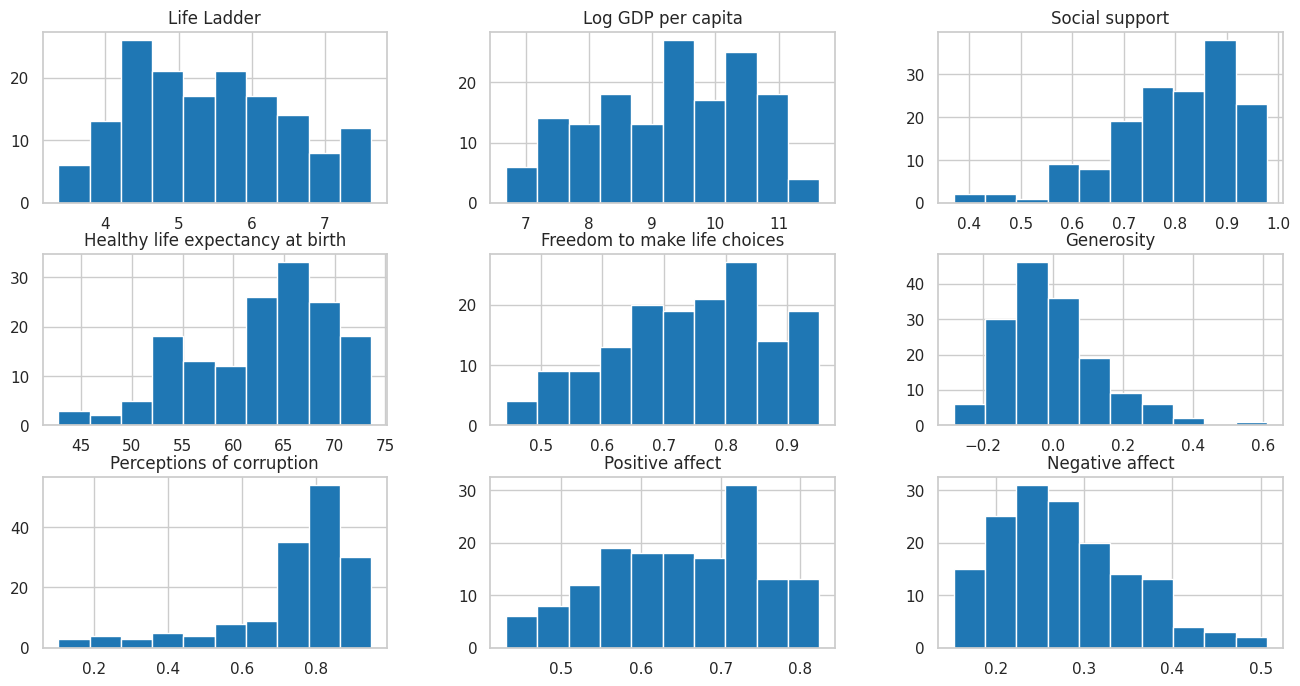

In [471]:
whr_df_grouped.hist(figsize=(16,8));

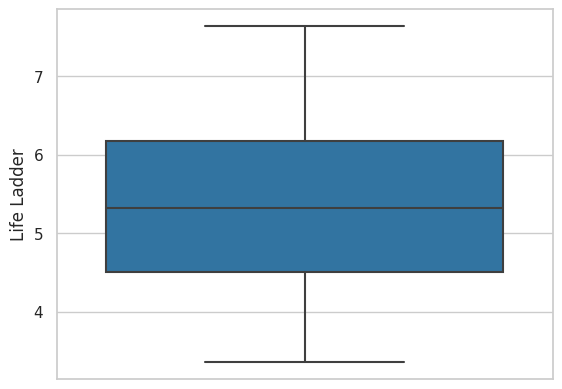

In [472]:
sns.boxplot(data=whr_df_grouped, y='Life Ladder');

Não há um país considerardo outlier.

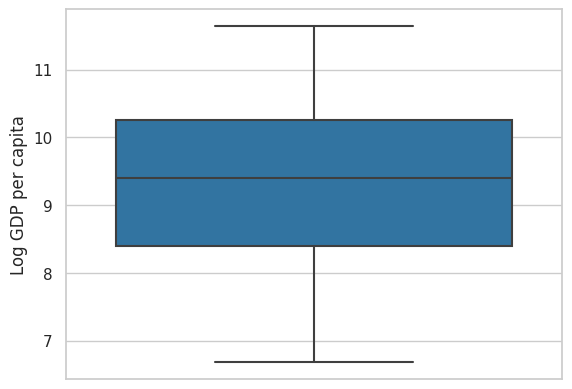

In [473]:
sns.boxplot(data=whr_df_grouped, y='Log GDP per capita');

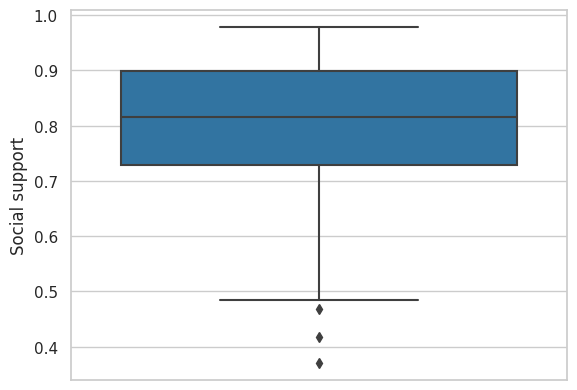

In [474]:
sns.boxplot(data=whr_df_grouped, y='Social support');

In [475]:
whr_df_grouped[whr_df_grouped['Social support'] < 0.5].index.unique()

Index(['Benin', 'Burundi', 'Central African Republic', 'Togo'], dtype='object', name='Country name')

Os países com suporte social abaixo de 0.5 são da África.

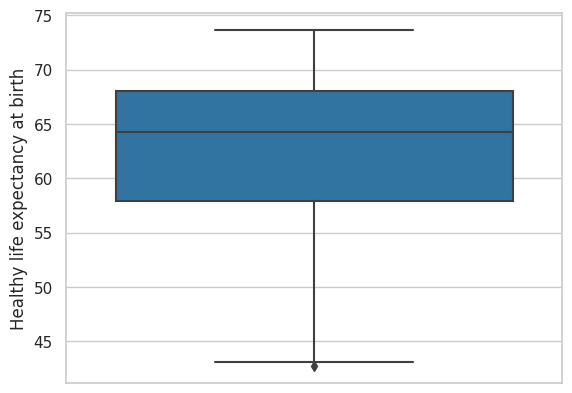

In [476]:
sns.boxplot(data=whr_df_grouped, y='Healthy life expectancy at birth');

In [477]:
whr_df_grouped[whr_df_grouped['Healthy life expectancy at birth'] < 45].index.unique()

Index(['Central African Republic', 'Haiti', 'Lesotho'], dtype='object', name='Country name')

Países com expectativa de vida inferior a 45 anos são Haiti, Lesotho e Central African Republic.

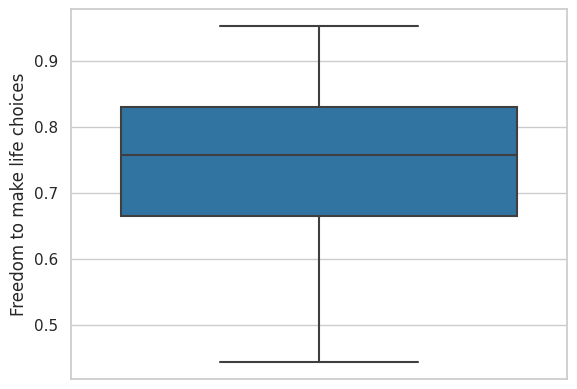

In [478]:
sns.boxplot(data=whr_df_grouped, y='Freedom to make life choices');

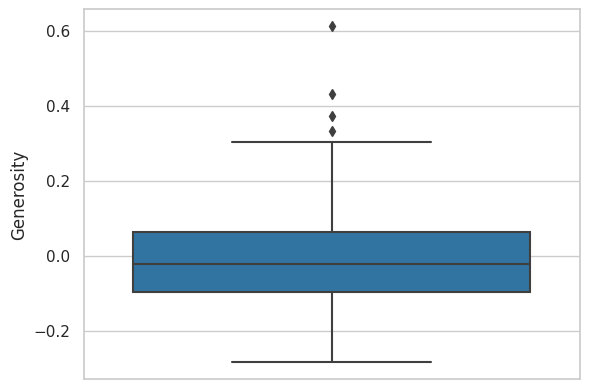

In [479]:
sns.boxplot(data=whr_df_grouped, y='Generosity');

In [480]:
whr_df_grouped[whr_df_grouped['Generosity'] > 0.3].index.unique()

Index(['Gambia', 'Indonesia', 'Myanmar', 'Thailand', 'United Kingdom'], dtype='object', name='Country name')

A maioria dos países com índice maior de generosidade são pequenos países da Ásia e o Reino Unido.

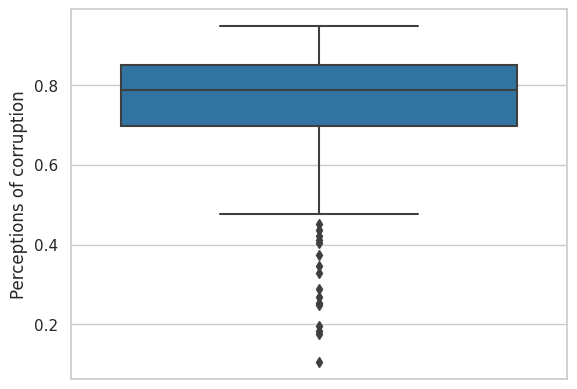

In [481]:
sns.boxplot(data=whr_df_grouped, y='Perceptions of corruption');

In [482]:
whr_df_grouped[whr_df_grouped['Perceptions of corruption'] < 0.4].index.unique()

Index(['Denmark', 'Finland', 'Luxembourg', 'New Zealand', 'Norway', 'Qatar',
       'Rwanda', 'Singapore', 'Sweden', 'Switzerland', 'United Arab Emirates'],
      dtype='object', name='Country name')

A maioria dos países com menor percepção de corrupção estão entre os 10 mais felizes.

## **Respondendo as perguntas de negócio propostas**

### **Pergunta 1**: O aumento do PIB per capita de um país afeta positivamente a expectativa de vida dos cidadãos ao nascer? Qual a correlação entre essas duas variáveis?

[]

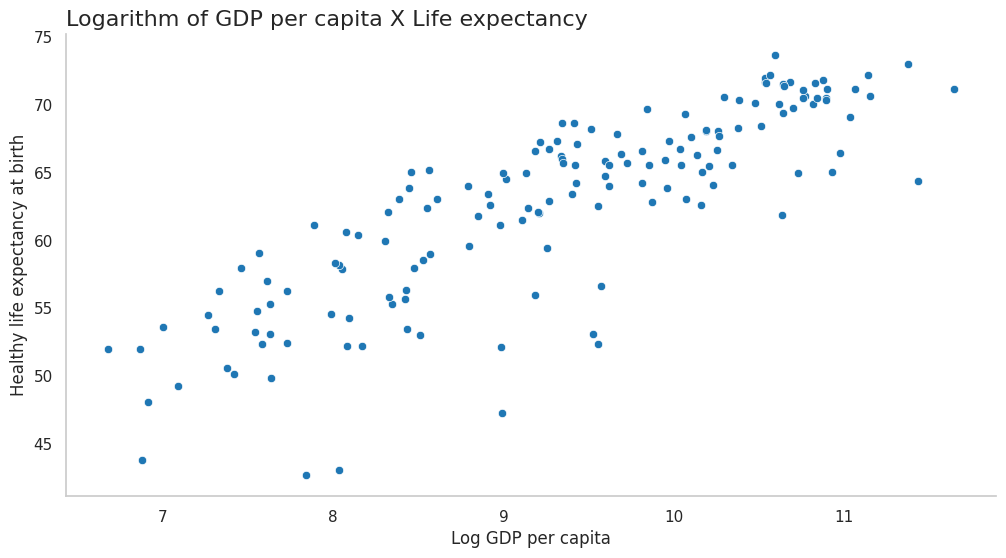

In [483]:
fig, ax = plt.subplots(figsize=(12,6))

ax = sns.scatterplot(x='Log GDP per capita',
                     y='Healthy life expectancy at birth',
                     data=whr_df_grouped)

ax.set_title('Logarithm of GDP per capita X Life expectancy',
             loc='left', fontsize=16)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(False)

plt.plot()

In [506]:
res, pvalue = spearmanr(whr_df_grouped['Log GDP per capita'],
                        whr_df_grouped['Healthy life expectancy at birth'],
                        nan_policy='omit')

res, pvalue

(0.8564716384196316, 8.62089371468297e-46)

Com o resultado acima é possível afirmar, com 95% de confiança, que há uma correlação positiva forte de 0.85 entre o PIB per capita de um país e a expectativa de vida dos cidadãos ao nascer.

Com as análises gráficas e de boxplot, também é possível afirmar que os pontos mais extremos, taxa de expectativa de vida abaixo de 40, são Haiti, Lesotho e Central African Republic.

### **Pergunta 2**: Existe uma correlação entre a escala de vida e a conscientização do público em geral sobre a corrupção nos negócios e no governo? Qual a correlação entre essas duas variáveis?

[]

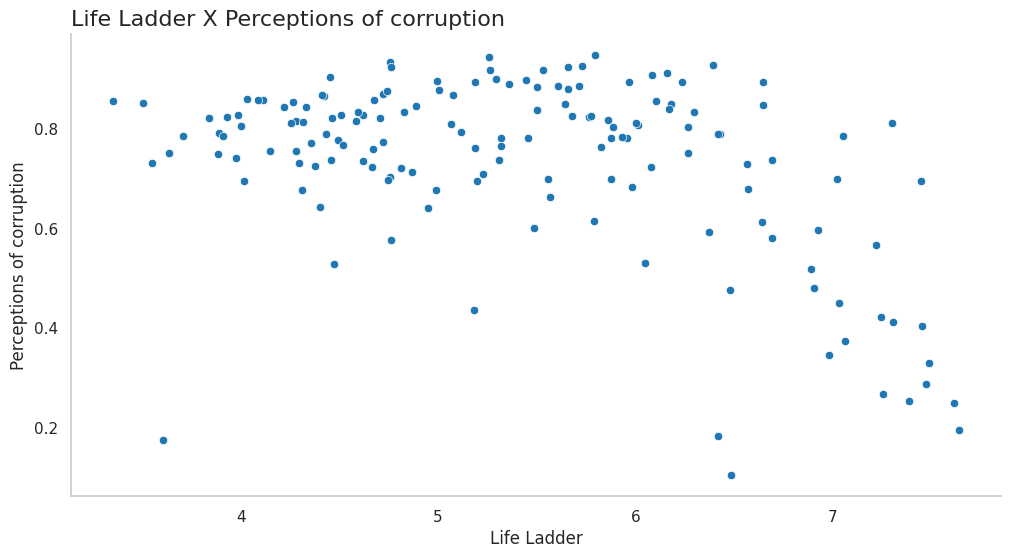

In [486]:
fig, ax = plt.subplots(figsize=(12,6))

ax = sns.scatterplot(x='Life Ladder',
                     y='Perceptions of corruption',
                     data=whr_df_grouped)

ax.set_title('Life Ladder X Perceptions of corruption',
             loc='left',
             fontsize=16)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(False)

plt.plot()

In [507]:
res, pvalue = spearmanr(whr_df_grouped['Life Ladder'],
                        whr_df_grouped['Perceptions of corruption'],
                        nan_policy='omit')

res, pvalue

(-0.28817956237311076, 0.00027667222359023763)

Com o resultado acima é possível afirmar, com 95% de confiança, que há uma correlação negativa de 0.28 entre o a escala de vida de um país e a percepção de um país.

### **Pergunta 3**: O aumento na escala de vida tem algum efeito na média de felicidade entre o público em geral? Qual a correlação entre essas duas variáveis?

[]

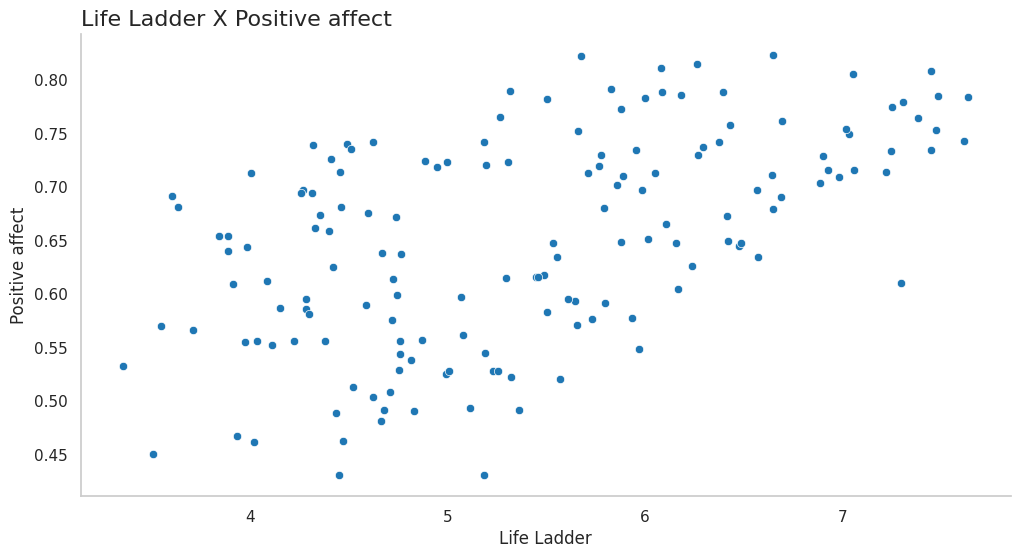

In [489]:
fig, ax = plt.subplots(figsize=(12,6))

ax = sns.scatterplot(x='Life Ladder',
                     y='Positive affect',
                     data=whr_df_grouped)

ax.set_title('Life Ladder X Positive affect',
             loc='left',
             fontsize=16)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(False)

plt.plot()

In [508]:
res, pvalue = spearmanr(whr_df_grouped['Life Ladder'],
                        whr_df_grouped['Positive affect'],
                        nan_policy='omit')

res, pvalue

(0.5311108246592118, 1.1660414986308977e-12)

Com o resultado acima é possível afirmar, com 95% de confiança, que há uma correlação positiva de 0.53 entre a escala de vida de um país e a o nível de felicidade do público em geral.

### **Pergunta 4**: O país com o menor índice de suporte social tem maior percepção de corrupção em relação às empresas e ao governo no país?

In [492]:
whr_df_grouped[whr_df_grouped['Social support'] == whr_df_grouped['Social support'].min()]

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
Country name,,,,,,,,,
Central African Republic,3.353661,6.881893,0.370125,43.8475,0.684819,0.017585,0.857129,0.533195,0.406872


In [493]:
whr_df_grouped[whr_df_grouped['Perceptions of corruption'] == whr_df_grouped['Perceptions of corruption'].max()]

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
Country name,,,,,,,,,
Romania,5.797341,10.135444,0.794699,66.280003,0.756755,-0.155563,0.948092,0.591946,0.28798


In [494]:
whr_df_grouped[['Social support', 'Perceptions of corruption']].describe()

,Social support,Perceptions of corruption
count,155.000000,155.000000
mean,0.799058,0.734688
std,0.118847,0.177862
min,0.370125,0.104529
25%,0.727927,0.697165
50%,0.815430,0.786831
75%,0.898075,0.849461
max,0.978162,0.948092


O país com menor índice de suporte social é a República Centro-Africana com 0.3701. Seu índice percepção de corrupção é 0.8571. Ele não é o país com maior índice de percepção de corrupção, que é a Romênia com índice de 0.9480, porém está entre os 25% com maior índice.

### **Pergunta 5**: Pessoas generosas são mais felizes?

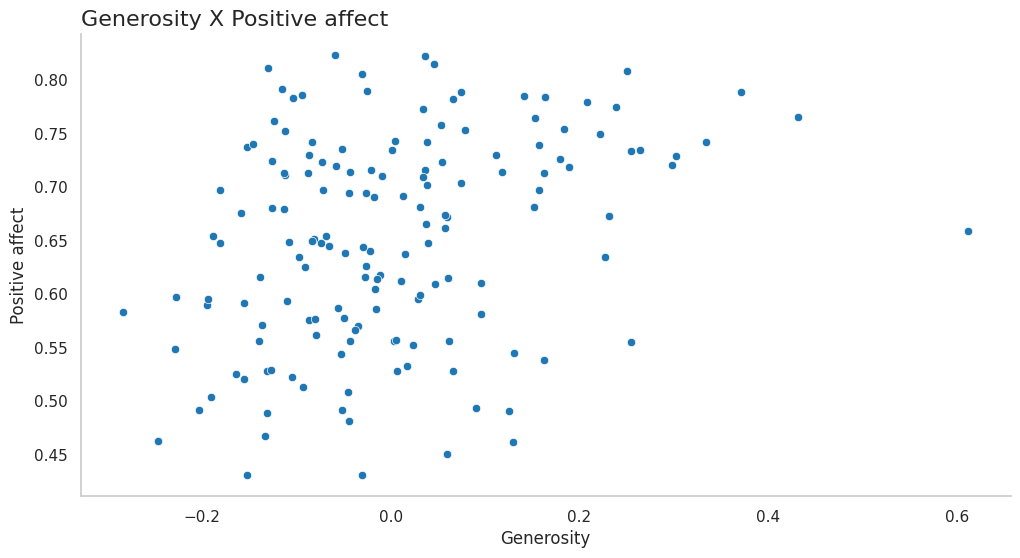

In [495]:
fig, ax = plt.subplots(figsize=(12,6))

ax = sns.scatterplot(x='Generosity',
                     y='Positive affect',
                     data=whr_df_grouped)

ax.set_title('Generosity X Positive affect',
             loc='left',
             fontsize=16)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(False)

In [496]:
res, pvalue = spearmanr(whr_df_grouped['Generosity'],
                        whr_df_grouped['Positive affect'],
                        nan_policy='omit')

In [497]:
res, pvalue

(0.306828655215752, 0.00010311022447844865)

Com o resultado acima é possível afirmar, com 95% de confiança, que há uma correlação positiva de 0.30 entre a generosidade e o nível de felicidade do público em geral. Pessoas mais generosas são mais felizes.

## **Fim do projeto**:

Com as respostas de negócio respondidas o projeto de análise de dados pode ser finalizado já que o objetivo foi alcançado!

É importante lembrar que as análises realizadas indicam a correlação entre os dados, e não causalidade.